In [1]:
import numpy as np
import pandas as pd
import pyranges as pr
from SiFoN import GWAS_enrichment as enr

### Case study for `GWAS_enrichment`

The `ccvs` should be read in as a dataframe. Rows correspond to SNPs. It should have the columns 
* `Chromosome` : The chromosome of the risk loci
* `Start`: The left endpoint of your seqeucne
* `End` : The right endpoint of your sequence
* `SNP` : Identifies the risk loci. This could be any identifier you choose (e.g. the rsID or coordinates of the loci risk SNP). 

Additional columns are acceptable, but will not affect plotting

`output.bed` is a reference of Sei predictions across the hg19 genome. This file is available through SiFoN. If your `ccvs` file uses different genomic coordinates, either create your own reference BED file or convert your `ccvs` file to hg19.

In [4]:
ccvs = pd.read_csv("test_input_data/Zhang_S5.csv", header = 0)
ccvs.head(3)

,Chromosome,Start,End,MAF,P-value,SNP
0,chr1,109682901,110762901,0.12,2.600000e-08,rs5776993
1,chr2,67341757,68421757,0.26,4.800000e-08,rs9712235
2,chr2,68852128,69932128,0.45,2.000000e-09,rs4602255


/home/bmacedo/IW/SiFoN/src/SiFoN/GWAS_enrichment.py:43: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  g.ax_col_dendrogram.set_xlim([0,0])


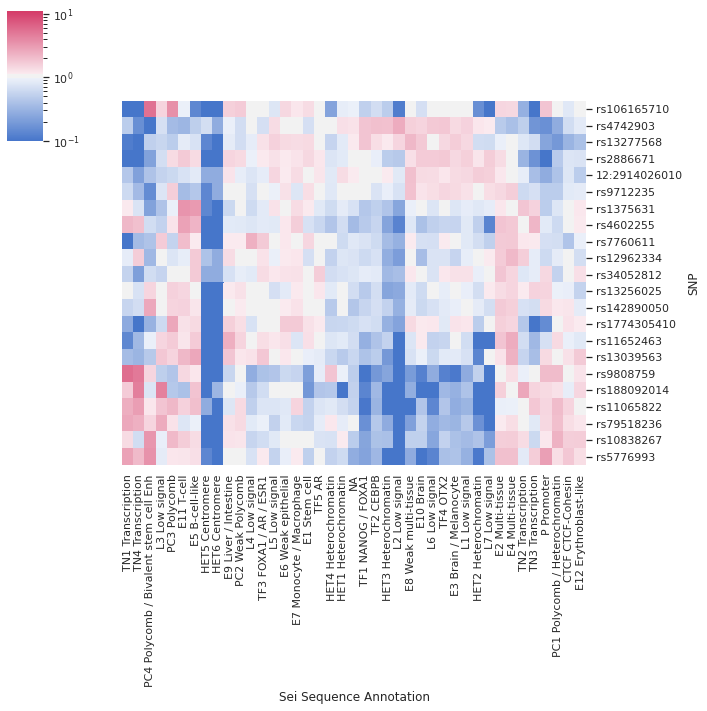

In [5]:
ref_bed = pr.read_bed("test_input_data/output.bed")
counts_in_loci = enr.find_enrichment(ccvs, ref_bed)
enr.plot_enrichment(counts_in_loci, "test_output_plots/GWAS_enrichment.png")